# CBIR using Self Organising Maps

In [1]:
from skimage import color, exposure, io
import numpy as np
from sklearn_som import som


In [2]:
images = io.imread_collection("../image/*.jpg")
bin_count = 10


In [3]:
len(images)

1000

We use histogram (specifically gray histogram) as feature for each image. This
function is provided by `skimage` library and normalizes the features
automatically.

In [4]:
def get_histogram(image, bins_count):
    gray, _ = exposure.histogram(
        color.rgb2gray(image), normalize=True, nbins=bins_count, source_range="dtype"
    )

    return gray


In [5]:
histograms = np.array([get_histogram(image, bin_count) for image in images])


In [6]:
histograms

array([[0.        , 0.        , 0.        , ..., 0.2890625 , 0.10013835,
        0.02768962],
       [0.        , 0.        , 0.        , ..., 0.30341593, 0.10340373,
        0.02308146],
       [0.        , 0.        , 0.        , ..., 0.20243327, 0.11354574,
        0.087382  ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.20765177, 0.15883382,
        0.46002197],
       [0.        , 0.        , 0.        , ..., 0.13086955, 0.1078186 ,
        0.02756755],
       [0.        , 0.        , 0.        , ..., 0.24273682, 0.24477132,
        0.05014038]])

In [7]:
def make_prediction(som_m, som_n):
    model = som.SOM(som_m, som_n, dim=bin_count)
    model.fit(histograms, 20)
    model.predict(histograms)
    return model.predict(histograms)


In [8]:
from sklearn import metrics

result = []

for i in range(2, 10):
    predictions = make_prediction(i, i)
    result.append([i, metrics.silhouette_score(histograms, predictions)])


In [9]:
import pandas

result_pandas = pandas.DataFrame(result, columns=["SOM dimesion", "Silhouette score"])


In [10]:
result_pandas

,SOM dimesion,Silhouette score
0,2,0.295067
1,3,0.228671
2,4,0.214487
3,5,0.183059
4,6,0.168272
5,7,0.166634
6,8,0.143291
7,9,0.149616


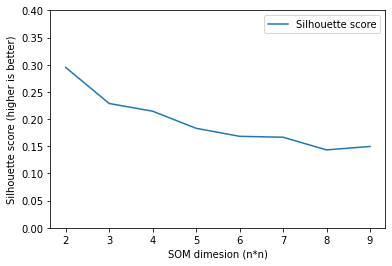

In [11]:
plot = result_pandas.plot(
    x="SOM dimesion",
    y="Silhouette score",
    ylabel="Silhouette score (higher is better)",
    xlabel="SOM dimesion (n*n)",
    legend=True,
    ylim=(0, 0.4)
).get_figure().savefig("som.svg", format="svg")


In [14]:
model = som.SOM(3, 3, dim=bin_count)
model.fit(histograms)
prediction = model.predict(histograms)


In [15]:
prediction

array([6, 7, 4, 8, 1, 7, 3, 6, 6, 6, 7, 7, 3, 3, 5, 1, 3, 0, 0, 6, 7, 7,
       7, 4, 0, 7, 4, 6, 4, 3, 6, 7, 3, 8, 5, 3, 6, 3, 3, 1, 1, 1, 3, 1,
       1, 0, 0, 4, 3, 3, 6, 3, 7, 7, 4, 3, 3, 0, 3, 3, 6, 7, 6, 1, 4, 0,
       3, 3, 7, 0, 6, 8, 4, 2, 6, 6, 3, 7, 0, 2, 6, 3, 3, 0, 3, 3, 5, 3,
       8, 3, 4, 4, 6, 4, 7, 1, 7, 7, 8, 6, 7, 5, 8, 7, 8, 3, 5, 8, 8, 4,
       6, 6, 6, 8, 3, 7, 6, 5, 7, 8, 8, 3, 7, 5, 7, 8, 8, 8, 8, 6, 8, 5,
       6, 6, 8, 6, 8, 8, 8, 8, 7, 6, 6, 6, 5, 8, 8, 6, 8, 8, 8, 6, 5, 7,
       7, 6, 6, 8, 8, 8, 4, 8, 8, 8, 7, 6, 7, 3, 6, 6, 7, 6, 6, 6, 6, 6,
       8, 8, 6, 8, 8, 6, 0, 6, 8, 8, 6, 6, 6, 0, 7, 8, 8, 7, 8, 8, 6, 8,
       8, 8, 6, 3, 8, 7, 8, 7, 4, 1, 3, 1, 1, 1, 4, 0, 6, 7, 1, 4, 4, 8,
       6, 5, 8, 1, 6, 6, 5, 6, 3, 8, 4, 4, 7, 3, 0, 7, 6, 4, 7, 8, 4, 8,
       8, 6, 6, 0, 8, 3, 7, 3, 0, 6, 5, 4, 1, 8, 5, 3, 5, 7, 3, 4, 1, 6,
       6, 1, 7, 8, 0, 3, 8, 8, 8, 0, 0, 4, 0, 8, 8, 7, 8, 8, 7, 1, 4, 8,
       8, 4, 8, 8, 4, 8, 5, 8, 5, 0, 7, 4, 8, 5, 0,

In [17]:
result_pandas.to_excel("som.xlsx")

# Finding adjusted rand score for SOM

In [18]:
model = som.SOM(5, 2, dim=bin_count)
model.fit(histograms)
prediction = model.predict(histograms)

In [19]:
true_labels = np.array([i for i in range(1000)]) // 100

In [20]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(true_labels, prediction)

0.2004079838061147